In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("./titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

### HANDLING MISSING VALUE

In [49]:
print(df.isnull().sum()) # shows the count of missing values in each colums

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [50]:
df_mean = df
df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28692\2401092982.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)


Here, We have handled missing Age using method of 'mean'.

In [51]:
# handling the column Embarked and Cabin.
df_mode = df

df_mode['Cabin'].fillna(df_mode['Cabin'].mode()[0], inplace=True)
df_mode.dropna(subset=['Embarked'], inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28692\3006390919.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mode['Cabin'].fillna(df_mode['Cabin'].mode()[0], inplace=True)


Now, we have handled Embarked and Cabin by dropping rows with Embarked, and using mode for cabin column.


## Feature Scaling

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,B96 B98,S


## Removing Outliers

Lower Bound: 0.26534428390319453
Upper Bound: 5.385970874137646
Original rows: 889
Remaining rows: 858
Rows removed: 31


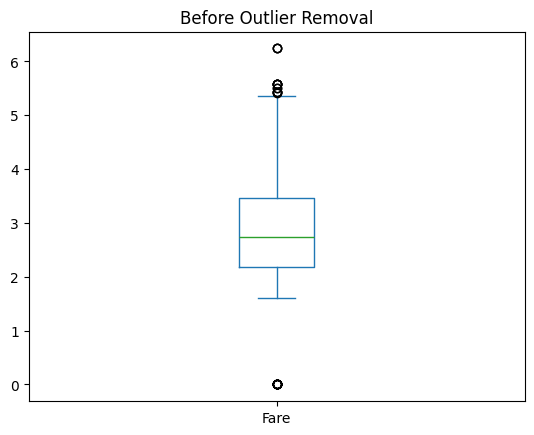

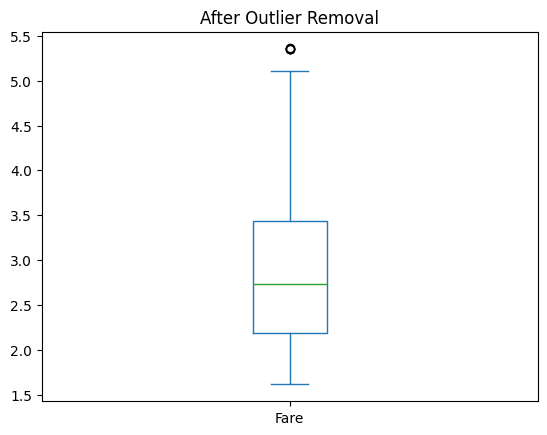

In [53]:
df = df_mode.copy() #new copy of dataset

# log transform fare
df["Fare"] = np.log1p(df["Fare"])

Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Lower Bound:", lower)
print("Upper Bound:", upper)

df_clean = df[(df["Fare"] >= lower) & (df["Fare"] <= upper)]

# check rows removed
print("Original rows:", df.shape[0])
print("Remaining rows:", df_clean.shape[0])
print("Rows removed:", df.shape[0] - df_clean.shape[0])

df["Fare"].plot.box()
plt.title("Before Outlier Removal")
plt.show()

df_clean["Fare"].plot.box()
plt.title("After Outlier Removal")
plt.show()

Outliers from fare removed.

In [54]:
from sklearn.preprocessing import StandardScaler

scale_cols = ["Age", "Fare", "SibSp", "Parch"]

scaler = StandardScaler()
df_clean[scale_cols] = scaler.fit_transform(df_clean[scale_cols])

df_clean.head()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28692\2122904879.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[scale_cols] = scaler.fit_transform(df_clean[scale_cols])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.580309,0.428407,-0.471308,A/5 21171,-1.031324,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.646073,0.428407,-0.471308,PC 17599,1.600706,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.273713,-0.474721,-0.471308,STON/O2. 3101282,-0.935953,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.416126,0.428407,-0.471308,113803,1.249314,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,0.416126,-0.474721,-0.471308,373450,-0.919087,B96 B98,S


## FEATURE SELECTION

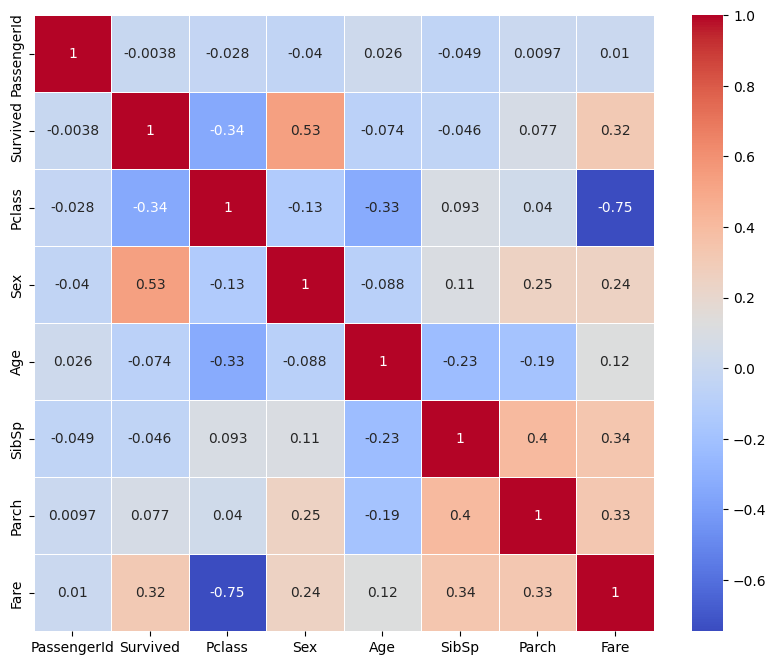

In [62]:
# not including the columns with strings.
titanic_new = df_clean.drop(columns=['Name','Ticket','Cabin','Embarked']) 

corr_matrix = titanic_new.corr() # calculates the correlation matrix

plt.figure(figsize=(10, 8)) # plot the heatmap for correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.4)
plt.show()



In [58]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.580309,0.428407,-0.471308,A/5 21171,-1.031324,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.646073,0.428407,-0.471308,PC 17599,1.600706,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.273713,-0.474721,-0.471308,STON/O2. 3101282,-0.935953,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.416126,0.428407,-0.471308,113803,1.249314,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,0.416126,-0.474721,-0.471308,373450,-0.919087,B96 B98,S


## Principal Component Analysis (PCA)

In [64]:
df = pd.read_csv("./titanic.csv")
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


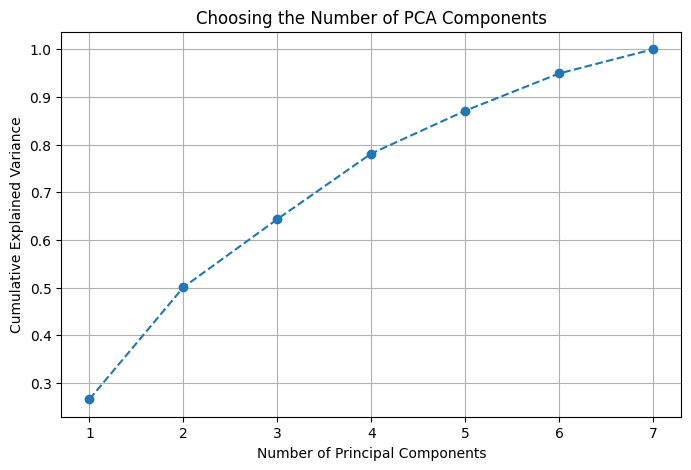

Optimal number of components: 7


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.404400,0.436126,-1.586026,-0.568886,-0.553524,0.083348,0.030753
1,-2.010531,-0.242859,-1.910159,-0.216765,-0.086472,0.780968,-0.249692
2,0.498849,-0.137741,-2.049091,0.934912,0.539368,0.236910,0.581477
3,-1.739571,-0.192182,-1.934800,-0.031739,-0.041360,0.829590,-0.518336
4,1.195063,-0.582130,-1.540958,-0.868792,0.098841,-0.275999,0.342562


In [72]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Use only numeric features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# 1) Impute missing values FIRST
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(numerical_features)

# 2) Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 3) PCA with all components to see variance
pca_all = PCA()
pca_all.fit(X_scaled)

explained_variance = np.cumsum(pca_all.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance,
         marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Number of PCA Components")
plt.grid()
plt.show()

# 4) Choose components to explain at least 95% variance
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")

# 5) Final PCA with chosen number of components
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca,
                      columns=[f"PC{i+1}" for i in range(optimal_components)])
pca_df.head()